$$
\color{red}{\textbf{In this exercise we build a ROC CURVE associated to the variable we want exploit to discriminate signal from backgrounds}}
$$

## **Installation**

In [22]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [23]:
!conda create -n SDAL python=3.10 -y
!source /usr/local/etc/profile.d/conda.sh && conda activate SDAL

!conda install -c conda-forge root=6.28.10 -y

import os
os.environ["PATH"] = "/usr/local/envs/SDAL/bin:" + os.environ["PATH"]
os.environ["PYTHONPATH"] = "/usr/local/envs/SDAL/lib/python3.10/site-packages"

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/SDAL

  added / updated specs:
    - python=3.10


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  bzip2              conda-forge/linux-64::bzip2-1.0.8-h4bc722e_7 
  ca-certificates    conda-forge/noarch::ca-certificates-2025.4.26-hbd8a1cb_0 
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.43-h712a8e2_4 
  libexpat           conda-forge/linux-64::libexpat-2.7.0-h5888daf_0 
  libffi             conda-forge/linux-64::libffi-3.4.6-h2dba641_1 
  libgcc             conda-forge/linux-64::libgcc-14.2.0-h767d61c_2 


## Download Files

In [ ]:
# Step 1: Download the Signal H->ZZ->2e2m (mass=150GeV) ROOT file
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qz0j5-2edlphKObMstg_b48hoS_JJtg3' -O H150_ZZ_4l_10TeV_GEN_HLT_Presel_glb_2e2mu_2e2mu_merged.root

# Step 2: Download the BKG ttbar ROOT file
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=10ozujuBRsGJlWBlCH9Kj3SoXpOX3EQoT' -O TT_4l_10TeV_Presel_4l_2e2mu_merged.root

# Step 2: Download the BKG Zbbar->2lbbar ROOT file
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hGHbEZFDy8a4IOeFCDhSmXXDwiJRuxHX' -O LLBB_4l_10TeV_Presel_4l_2e2mu_merged.root


--2025-04-29 16:50:54--  https://docs.google.com/uc?export=download&id=1qz0j5-2edlphKObMstg_b48hoS_JJtg3
Resolving docs.google.com (docs.google.com)... 74.125.20.113, 74.125.20.101, 74.125.20.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qz0j5-2edlphKObMstg_b48hoS_JJtg3&export=download [following]
--2025-04-29 16:50:54--  https://drive.usercontent.google.com/download?id=1qz0j5-2edlphKObMstg_b48hoS_JJtg3&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.188.132, 2607:f8b0:400e:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5302746 (5.1M) [application/octet-stream]
Saving to: ‘H150_ZZ_4l_10TeV_GEN_HLT_Presel_glb_2e2mu_2e2mu_merged.root’

H150_ZZ_4l_10TeV_GE 100%[=

## Create Folders

**Setup: Choose working mode**

Select the appropriate mode by setting the `MODE` variable in the next cell.

- `"temp"`: Use Colab's temporary storage (`/content/`).  
  This does **not require Google Drive**.  
  All `.root` files must already be in `/content/` (e.g., uploaded or downloaded there).  
  These files will be moved into a subfolder (`content/exercise_9/`) for processing.  
  **Important:** All data in `/content/` is deleted when the Colab session ends.

- `"drive_cp"`: Use Google Drive and copy all `.root` files from `/content/` into your Drive.  
  This creates two folders under `Colab Notebooks`:  
  - `exercise_9/` for data  
  - `Plots/` for outputs  
  Recommended for first-time setup.

- `"drive_use"`: Use Google Drive assuming the `.root` files are **already** in your Drive.  
  Use this mode to resume work without copying files again.

---


In [24]:
# MODE options:
# "temp":      use temporary /content space, move .root files to temp data_dir
# "drive_cp":  use Google Drive, copy .root files into Drive
# "drive_use": use Google Drive, assume files already exist there

MODE = "drive_use"  # ← change to "temp" or "drive_cp" if needed

number = 9   # exercise label

import os
if MODE.startswith("drive"):
    from google.colab import drive
    drive.mount('/content/drive/')
    base = "/content/drive/My Drive/Colab Notebooks/"
    data_dir = f"{base}exercise_{number}/"
    plot_dir = f"{base}exercise_{number}/Plots/"
else:
    data_dir = f"/content/exercise_{number}/"
    plot_dir = f"/content/exercise_{number}/Plots/"

os.makedirs(data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

if MODE == "drive_cp":
    !cp *.root "$data_dir"
elif MODE == "temp":
    if any(fname.endswith(".root") for fname in os.listdir()):
        !cp *.root "$data_dir"

if not any(fname.endswith(".root") for fname in os.listdir(data_dir)):
    print("No ROOT files found.")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##START HERE


$$
\LARGE \color{red}{\textbf{! If the session crashes, please start from here. !}}
$$

In [36]:
import ROOT
from datetime import datetime
from array import array
from ROOT import gROOT

date = datetime.now().strftime("%Y-%m-%d")

# -- historically we had many variables
# var1==AllLeptIP3D, Ele(Mu)IP_best(worst), Ele(Mu)SLIP_best(worst), Ele(Mu)STIP_best(worst), LeptIP3D_worst, LeptSTIP_SLIP_worst, etc.
# var2=="", AllLeptIP3D, Ele(Mu)IP_best(worst), Ele(Mu)SLIP_best(worst), Ele(Mu)STIP_best(worst), LeptIP3D_worst, LeptSTIP_SLIP_worst, etc.
# -- the one we compare here are: var1=LeptIP3D_worst, var2=LeptSTIP_SLIP_worst

#ROOT.gROOT.Reset()
#ROOT.gROOT.Clear()

# configuring graphics style
ROOT.gStyle.SetCanvasColor(0)
ROOT.gStyle.SetPadColor(0)
# ROOT.gStyle.SetHistFillColor(0)
# ROOT.gStyle.SetHistLineStyle(1)
# ROOT.gStyle.SetHistLineWidth(1)
# ROOT.gStyle.SetHistLineColor(1)
ROOT.gStyle.SetTitleXOffset(0.9)
ROOT.gStyle.SetTitleYOffset(1.15)
# ROOT.gStyle.SetOptStat(1110)
# ROOT.gStyle.SetOptStat(kFALSE)
ROOT.gStyle.SetOptFit(111)  # In ROOT, 0111 is valid (octal), but in Python, leading zeros are not allowed in decimal numbers.
ROOT.gStyle.SetStatH(0.1)
ROOT.gStyle.SetPadTopMargin(0.09)
ROOT.gStyle.SetPadBottomMargin(0.13)
ROOT.gStyle.SetPadLeftMargin(0.12)
ROOT.gStyle.SetPadRightMargin(0.10)
ROOT.gStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptTitle(1)
ROOT.gStyle.SetStatFont(42)
ROOT.gStyle.SetTitleFont(42)
ROOT.gStyle.SetTitleSize(1)

ROOT.gROOT.SetStyle("Plain")  # change of style
ROOT.gStyle.SetNdivisions(10)
ROOT.gStyle.SetCanvasBorderMode(0)
ROOT.gStyle.SetPadBorderMode(0)
# ROOT.gStyle.SetOptLogy(0)

#ROOT.gROOT.ForceStyle()  # force style to be applied

In [37]:
# opening files in READ mode:
f = [ROOT.TFile(f"{data_dir}H150_ZZ_4l_10TeV_GEN_HLT_Presel_glb_2e2mu_2e2mu_merged.root", "READ"),  # Signal H->ZZ->2e2m (mass=150GeV)
     ROOT.TFile(f"{data_dir}TT_4l_10TeV_Presel_4l_2e2mu_merged.root", "READ"),                     # BKG ttbar
     ROOT.TFile(f"{data_dir}LLBB_4l_10TeV_Presel_4l_2e2mu_merged.root", "READ")]                   # BKG Zbbar->2lbbar

# Define TGraph variables for the signal vs background comparison
gr_h150_TT_vtx = ROOT.TGraph()   # signal vs tt for var1
gr_h150_Zbb_vtx = ROOT.TGraph()  # signal vs Zbb for var1

gr_h150_TT_wrkgPt = ROOT.TGraph()

gr_h150_TT_var2 = ROOT.TGraph()    # signal vs tt for var2
gr_h150_Zbb_var2 = ROOT.TGraph()   # signal vs Zbb for var2





# **1st discriminant Variable**

In [38]:
#-- 1ST VARIABLE [LeptIP3D_worst]
# Define histograms
hVar1 = [ROOT.TH1D() for _ in range(3)]
hVar1Ratio = [ROOT.TH1D() for _ in range(3)]

# Define arrays for integrals and efficiency
TotIntegral1 = [0.0] * 3
PartIntegral1 = [0.0] * 3
Eff1 = [0.0] * 3
IntegralCounts1 = [[0] * 500 for _ in range(3)]  # keep the matrix large for possible rebinning (we will use 200 bins by default)

# Histogram name array
histoname = [''] * 128

# Dummy initialization for nBins1
nBins1 = 200

var1 = "LeptIP3D_worst"

for i in range(3):
    hVar1[i] = f[i].Get(f"h{var1}")

    # ---------- Integrals
    nBins1 = hVar1[i].GetNbinsX()
    print(f"# of bins of hVar1 = {nBins1}")  # by default they are 200

    TotIntegral1[i] = hVar1[i].Integral(1, 201)  # that's why the total integral is obtained integrating over 200 bins

    # Creating histogram for the ratio
    histoname[i] = f"hVarRatio[{i}]"
    hVar1Ratio[i] = ROOT.TH1D(histoname[i], "Partial integral over total", 200, 0., 1.)

    for j in range(1, nBins1 + 1):                    # this is a nested loop
        PartIntegral1[i] = hVar1[i].Integral(1, j)    # partial integral from bin 1 to bin j (till reaching the bin 200))
        Eff1[i] = PartIntegral1[i] / TotIntegral1[i]  # in the j-loop this is a partial ratio updated at each j value
        IntegralCounts1[i][j - 1] = Eff1[i]           # that's why we save it in a ixj matrix and in the following histogram:

        hVar1Ratio[i].Fill(Eff1[i])  # which is not extremely relevant since it saturates to 1 and for the signal it does it very quickly!

        # let me just check the saturation to 1 with this printout:
        if i == 0 and j == 200:
            print(f"i = {i}, j = {j}: eff1 = {IntegralCounts1[i][j-1]}")
        if i == 1 and j == 200:
            print(f"i = {i}, j = {j}: eff1 = {IntegralCounts1[i][j-1]}")
        if i == 2 and j == 200:
            print(f"i = {i}, j = {j}: eff1 = {IntegralCounts1[i][j-1]}")


# of bins of hVar1 = 200
i = 0, j = 200: eff1 = 0.9997283346916599
# of bins of hVar1 = 200
i = 1, j = 200: eff1 = 0.9896125480419653
# of bins of hVar1 = 200
i = 2, j = 200: eff1 = 0.9958837470375452


In [39]:
# configure properly a function to plot with the right stat-box

def add_stats_box(histogram, pad, x1=0.7, y1=0.7, x2=0.9, y2=0.9):
    pad.cd()

    histogram.SetStats(True)

    # Draw with error bars (auto‑creates the stats box on the specified pad)
    histogram.Draw("Ehist")
    pad.Update()

    # Grab ROOT’s built‑in TPaveStats (named "stats")
    stats = histogram.FindObject("stats")

    if stats and isinstance(stats, ROOT.TPaveStats):
        # Re-positioning
        stats.SetX1NDC(x1); stats.SetY1NDC(y1)
        stats.SetX2NDC(x2); stats.SetY2NDC(y2)
        stats.SetOptStat(111110)

        stats.SetTextSize(0.035)
        stats.SetBorderSize(1)
        stats.SetMargin(0.12)
        stats.Draw()
    else:
        print(f"Warning: stats box not found for {histogram.GetName()}")

    pad.Modified()
    pad.Update()

Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/exercise_9/Plots/HistoLeptIP3D_worst_2025-05-03.png has been created


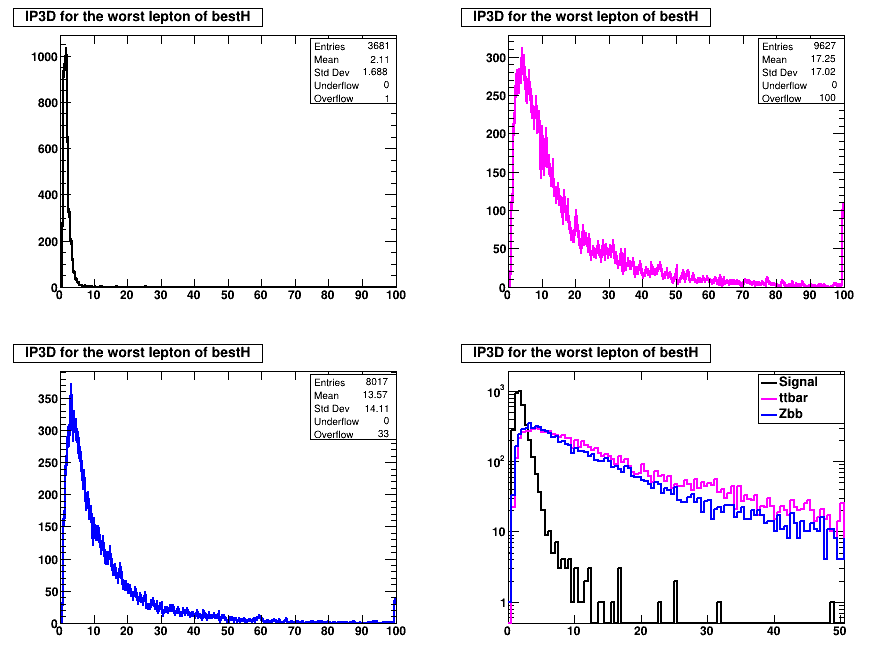

In [40]:
# Create the canvas
MyC = ROOT.TCanvas("MyC", "Plots", 900, 700)

# Divide the canvas into 2x2 grid
MyC.Divide(2, 2)

# first pad
pad1 = MyC.cd(1)
hVar1[0].SetFillColor(0) # Set fill color to transparent
hVar1[0].SetLineWidth(2)
#hVar1[0].SetAxisRange(0., 50., "X") # Set X-axis range for zoom
add_stats_box(hVar1[0], pad1)    # calling the fucntion here


# second pad
pad2 = MyC.cd(2)
ovflw_bkg1 = hVar1[1].GetBinContent(nBins1 + 1) # Get the overflow bin content
hVar1[1].AddBinContent(nBins1, ovflw_bkg1) # Add overflow content to the last visible bin
hVar1[1].SetLineColor(6) # Set line color (6 corresponds to magenta)
hVar1[1].SetLineWidth(2)
add_stats_box(hVar1[1], pad2)   # calling the function here
# third pad
pad3 = MyC.cd(3)
ovflw_bkg2 = hVar1[2].GetBinContent(nBins1 + 1)
hVar1[2].AddBinContent(nBins1, ovflw_bkg2)
hVar1[2].SetLineColor(4) # Set line color (4 corresponds to blue)
hVar1[2].SetLineWidth(2)
add_stats_box(hVar1[2], pad3)    # calling the function here

# 4. Pad: Overlaying All Histograms with Log Scale
# Clone histograms to preserve the original ones

hVar1_clone = [h.Clone(f"{h.GetName()}_clone") for h in hVar1]

pad4 = MyC.cd(4)
pad4.SetLogy()

# Configure and draw the cloned histograms without stats boxes
hVar1_clone[0].SetStats(False)
hVar1_clone[0].SetLineWidth(2)
hVar1_clone[0].SetAxisRange(0., 50., "X") # Set X-axis range for zoom
hVar1_clone[0].Draw()

hVar1_clone[1].SetStats(False)
hVar1_clone[1].SetLineWidth(2)
hVar1_clone[1].Draw("same")

hVar1_clone[2].SetStats(False)
hVar1_clone[2].SetLineWidth(2)
hVar1_clone[2].Draw("same")

# Create and configure the legend (optional)
legend = ROOT.TLegend(0.7, 0.75, 0.9, 0.9)
legend.AddEntry(hVar1_clone[0], "Signal", "l")
legend.AddEntry(hVar1_clone[1], "ttbar", "l")
legend.AddEntry(hVar1_clone[2], "Zbb", "l")
legend.Draw()

MyC.Update()

MyC.Draw()
MyC.SaveAs(f"{plot_dir}Histo{var1}_{date}.png")

In [41]:
MyC.Clear()

# 2nd discriminant Var

In [31]:
# do the same for VARIABLE-2
var2 = "LeptSTIP_SLIP_worst"

hVar2 = [ROOT.TH1D() for _ in range(3)]
hVar2Ratio = [ROOT.TH1D() for _ in range(3)]

TotIntegral2 = [0.0] * 3
PartIntegral2 = [0.0] * 3
Eff2 = [0.0] * 3
IntegralCounts2 = [[0] * 500 for _ in range(3)]  # keep matrix large for possible rebinning

histoname2 = [''] * 128

nBins2 = 100 #just a dummy inizialization

for i in range(3):
    hVar2[i] = f[i].Get(f"h{var2}")

    #  Integrals
    nBins2 = hVar2[i].GetNbinsX()
    print(f"# of bins of hVar2 = {nBins2}")  # by default they are 500
    #
    TotIntegral2[i] = hVar2[i].Integral(1, 501)  # that's why the total integral is obtained integrating over 500 bins
    #
    histoname2 = f"hVar2Ratio[{i}]"
    hVar2Ratio[i] = ROOT.TH1D(histoname2, "Partial integral over total", 500, 0., 1.)
    #
    for j in range(1, nBins2 + 1):
        PartIntegral2[i] = hVar2[i].Integral(1, j)  # partial integral from bin 1 to bin j (till reaching the bin 200))
        Eff2[i] = PartIntegral2[i] / TotIntegral2[i]  # in the j-loop this is a partial ratio updated at each j value
        IntegralCounts2[i][j - 1] = Eff2[i]           # that's why we save it in a ixj matrix and in the following histogram:

        hVar2Ratio[i].Fill(Eff2[i])  # which is not extremely relevant since it saturates to 1 and for the signal this happens very quickly!

        # let me check the saturation to 1 with this printout:
        if i == 0 and j == 500:
            print(f"i = {i} , j = {j} : eff2 = {IntegralCounts2[i][j-1]}")
        if i == 1 and j == 500:
            print(f"i = {i} , j = {j} : eff2 = {IntegralCounts2[i][j-1]}")
        if i == 2 and j == 500:
            print(f"i = {i} , j = {j} : eff2 = {IntegralCounts2[i][j-1]}")


# of bins of hVar2 = 500
i = 0 , j = 500 : eff2 = 0.9997283346916599
# of bins of hVar2 = 500
i = 1 , j = 500 : eff2 = 0.995195822454308
# of bins of hVar2 = 500
i = 2 , j = 500 : eff2 = 0.9973736868434218


Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/exercise_9/Plots/Histo_LeptSTIP_SLIP_worst_2025-05-03.png has been created


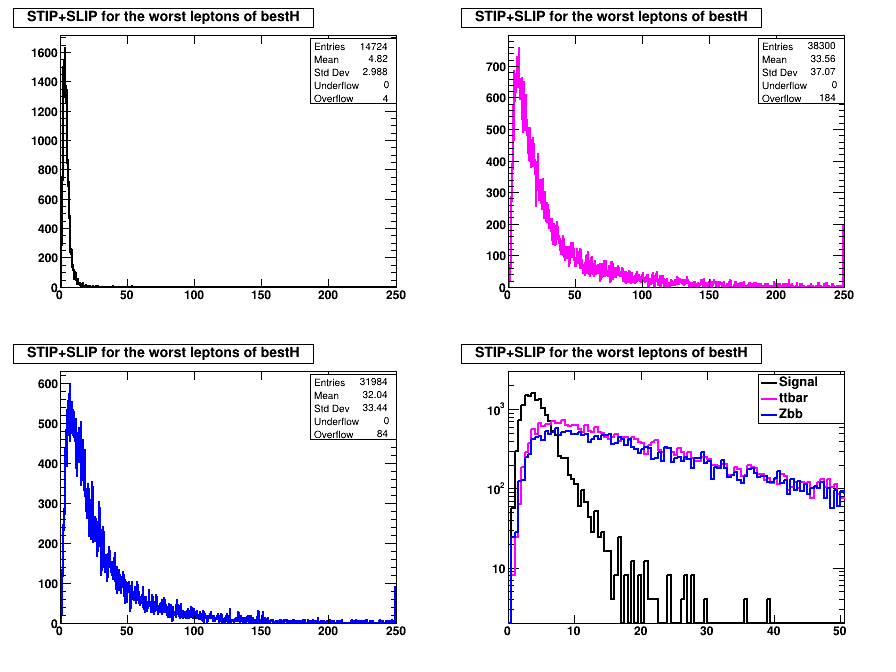

In [32]:
MyC.Clear()

MyC.Divide(2, 2)

# 1. Pad - Signal (hVar2[0])
pad1_hVar2 = MyC.cd(1)
hVar2[0].SetFillColor(0)
hVar2[0].SetLineWidth(2)
#hVar2[0].SetAxisRange(0., 50., "X")
add_stats_box(hVar2[0], pad1_hVar2)

# 2. Pad - TTbar (hVar2[1])
pad2_hVar2 = MyC.cd(2)
ovflw_bkg21 = hVar2[1].GetBinContent(nBins2 + 1)
hVar2[1].AddBinContent(nBins2, ovflw_bkg21)
hVar2[1].SetLineColor(6)
hVar2[1].SetLineWidth(2)
add_stats_box(hVar2[1], pad2_hVar2)

# 3. Pad - Zbb (hVar2[2])
pad3_hVar2 = MyC.cd(3)
ovflw_bkg22 = hVar2[2].GetBinContent(nBins2 + 1)
hVar2[2].AddBinContent(nBins2, ovflw_bkg22)
hVar2[2].SetLineColor(4)
hVar2[2].SetLineWidth(2)
add_stats_box(hVar2[2], pad3_hVar2)

# 4. Pad -  now superimpose the 3 components
pad4_hVar2 = MyC.cd(4)
pad4_hVar2.cd()
pad4_hVar2.SetLogy()

hVar2_clone = [h.Clone(f"{h.GetName()}_clone") for h in hVar2]

hVar2_clone[0].SetStats(False)
hVar2_clone[0].SetLineWidth(2)
hVar2_clone[0].SetAxisRange(0., 50., "X")
hVar2_clone[0].Draw()

hVar2_clone[1].SetStats(False)
hVar2_clone[1].SetLineWidth(2)
hVar2_clone[1].Draw("same")

hVar2_clone[2].SetStats(False)
hVar2_clone[2].SetLineWidth(2)
hVar2_clone[2].Draw("same")

legend = ROOT.TLegend(0.7, 0.75, 0.9, 0.9)
legend.AddEntry(hVar2_clone[0], "Signal", "l")
legend.AddEntry(hVar2_clone[1], "ttbar", "l")
legend.AddEntry(hVar2_clone[2], "Zbb", "l")
legend.Draw()

pad4_hVar2.Update()

MyC.SaveAs(f"{plot_dir}Histo_{var2}_{date}.png")

MyC.Draw()

In [33]:
# Clear canvas
MyC.Clear()
MyC.Close()

Now draw ratios  PartIntegral[i]/TotIntegral[i]
which however are not really relevant since they saturate to 1 and for the signal this happens it very quickly!


Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/exercise_9/Plots/Integral-over-Total_LeptIP3D_worst_2025-05-03.png has been created


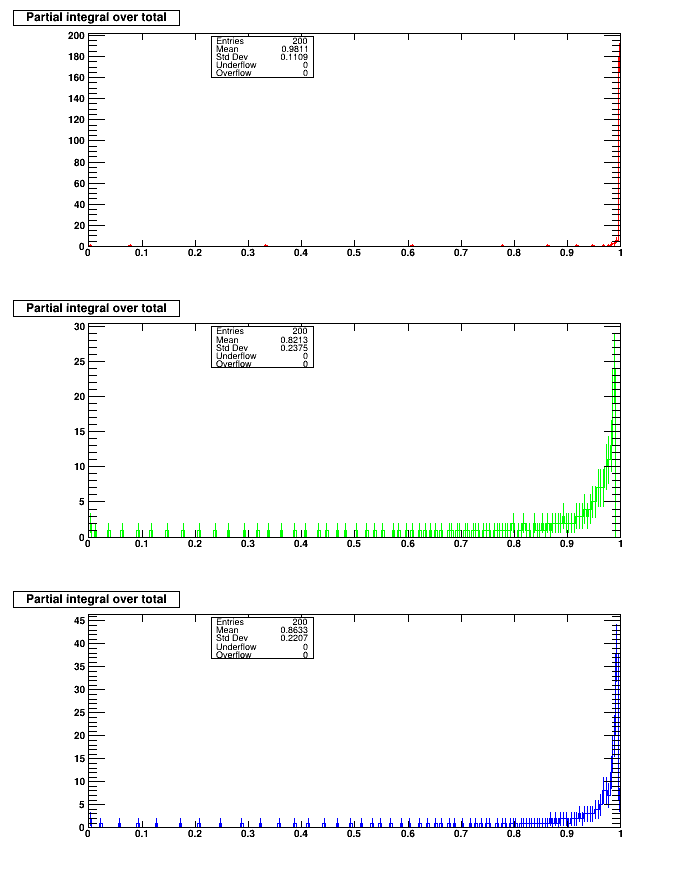

In [42]:

# Now draw ratios  PartIntegral[i]/TotIntegral[i]
# but not extremely relevant since they saturate to 1 and for the signal this happens very quickly!
#
def add_legend_label_strict(pad, label, x1=0.1, y1=0.8, x2=0.2, y2=0.9):
    pad.cd()
    legend = ROOT.TLegend(x1, y1, x2, y2)
    legend.SetFillColor(0)
    legend.SetTextSize(0.05)
    legend.AddEntry("", label, "")
    legend.Draw()
    pad.Update()

canvas_integral = ROOT.TCanvas("Integral_Ratios", "Integral Ratios", 700, 900)

canvas_integral.SetGridx(True)
canvas_integral.SetGridy(True)
canvas_integral.Divide(0, 3)

stat_box_x1 = 0.30
stat_box_y1 = 0.75
stat_box_x2 = 0.45
stat_box_y2 = 0.90

# Pad 1
padR1 = canvas_integral.cd(1)
hVar1Ratio[0].SetLineColor(2)
add_stats_box(hVar1Ratio[0], padR1, stat_box_x1, stat_box_y1, stat_box_x2, stat_box_y2)
#hVar1Ratio[0].SetTitle("Signal")
add_legend_label_strict(padR1, "signal")

# Pad 2
padR2 = canvas_integral.cd(2)
hVar1Ratio[1].SetLineColor(3)
add_stats_box(hVar1Ratio[1], padR2, stat_box_x1, stat_box_y1, stat_box_x2, stat_box_y2)
#hVar1Ratio[1].SetTitle("t#bar{t}")
add_legend_label_strict(padR2,"t#bar{t}")

# Pad 3
padR3 = canvas_integral.cd(3)
hVar1Ratio[2].SetLineColor(4)
add_stats_box(hVar1Ratio[2], padR3, stat_box_x1, stat_box_y1, stat_box_x2, stat_box_y2)
#hVar1Ratio[2].SetTitle("Zb#bar{b}")
add_legend_label_strict(padR3, "Zb#bar{b}")

canvas_integral.Update()
canvas_integral.Draw()
canvas_integral.SaveAs(f"{plot_dir}Integral-over-Total_{var1}_{date}.png")


In [43]:
canvas_integral.Clear()
canvas_integral.Close()

# Draw ROC for var1 and both bkgs

Warning in <TCanvas::Constructor>: Deleting canvas with same name: scatter_canvas
Warning in <TFile::Append>: Replacing existing TH1: hframe1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hframe2 (Potential memory leak).
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/exercise_9/Plots/scatt-effic_H150-vsBkgs_LeptIP3D_worst_2025-05-03.png has been created


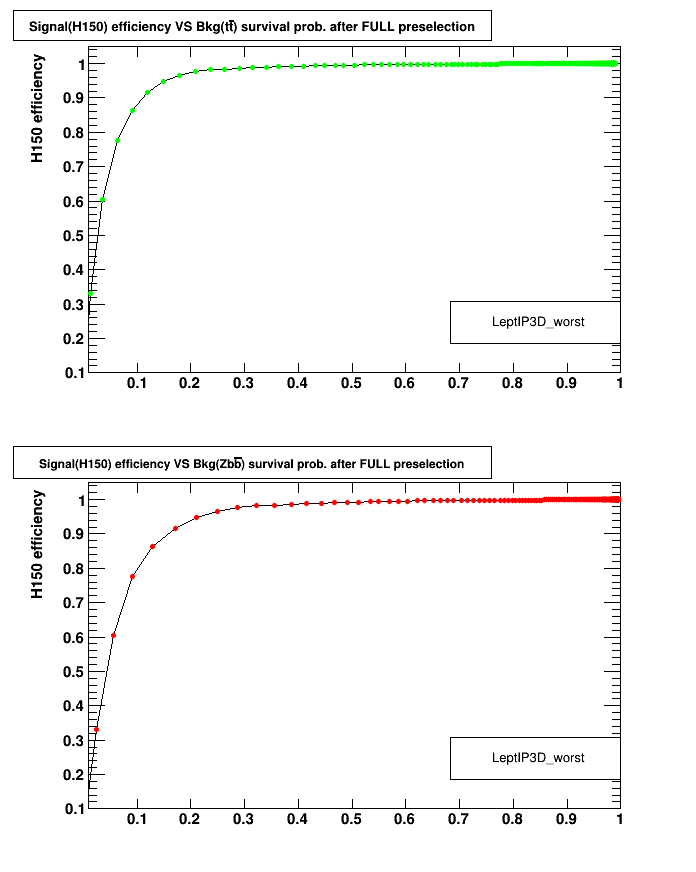

In [47]:
# Draw ROC curve for each bkg - 1 VARIABLE

canvas_scatter = ROOT.TCanvas("scatter_canvas", "Canvas Scatter", 700, 900)
# VARIABLE-1 vs Bkgs scatter plots
canvas_scatter.Divide(0, 2)
canvas_scatter.SetGridx()
canvas_scatter.SetGridy()


# Pad 1: H150 vs t#bar{t}
scat_pad_1 = canvas_scatter.cd(1)
hframe1 = ROOT.TH2F(
    "hframe1",
    "Signal(H150) efficiency VS Bkg(t#bar{t}) survival prob. after FULL preselection",
    100, 0.01, 1.0, 100, 0.1, 1.05
)
hframe1.SetStats(False)

hframe1.Draw()
hframe1.SetYTitle("H150 efficiency")
hframe1.SetXTitle("t#bar{t} survival efficiency")
#hframe1.GetXaxis().SetNdivisions(505)

x_tt = array('d', IntegralCounts1[1][:nBins1])
y_tt = array('d', IntegralCounts1[0][:nBins1])
gr_h150_TT_vtx = ROOT.TGraph(nBins1, x_tt, y_tt)
gr_h150_TT_vtx.SetMarkerColor(3)
gr_h150_TT_vtx.SetMarkerSize(0.6)
gr_h150_TT_vtx.SetMarkerStyle(20)
gr_h150_TT_vtx.Draw("LP")

txt1 = ROOT.TLegend(0.65, 0.2, 0.9, 0.3)
txt1.SetTextFont(42)
txt1.SetFillColor(0)
txt1.SetTextSize(0.035)
txt1.AddEntry("", var1, "")
txt1.Draw()

# Pad 2: H150 vs Zb#bar{b}
scat_pad_2 = canvas_scatter.cd(2)
hframe2 = ROOT.TH2F(
    "hframe2",
    "Signal(H150) efficiency VS Bkg(Zb#bar{b}) survival prob. after FULL preselection",
    100, 0.01, 1.0, 100, 0.1, 1.05
)
hframe2.SetStats(False)
hframe2.Draw()
hframe2.SetYTitle("H150 efficiency")
hframe2.SetXTitle("Zb#bar{b} survival efficiency")

x_zbb = array('d', IntegralCounts1[2][:nBins1])
y_zbb = array('d', IntegralCounts1[0][:nBins1])
gr_h150_Zbb_vtx = ROOT.TGraph(nBins1, x_zbb, y_zbb)
gr_h150_Zbb_vtx.SetMarkerColor(2)
gr_h150_Zbb_vtx.SetMarkerSize(0.6)
gr_h150_Zbb_vtx.SetMarkerStyle(20)
gr_h150_Zbb_vtx.Draw("LP")

txt2 = ROOT.TLegend(0.65, 0.2, 0.9, 0.3)
txt2.SetTextFont(42)
txt2.SetFillColor(0)
txt2.SetTextSize(0.035)
txt2.AddEntry("", var1, "")
txt2.Draw()

canvas_scatter.Update()
canvas_scatter.Draw()
canvas_scatter.SaveAs(f"{plot_dir}scatt-effic_H150-vsBkgs_{var1}_{date}.png")


In [51]:
# If desired, we can compute the AUC via NumPy’s trapezoid rule.
# First, define a helper to pad the ROC endpoints to (0,0) and (1,1).

import numpy as np

def closed_curve(x, y):
    #Pad the ROC curve with (0,0) and (1,1) so the trapezoidal integration
    #covers the full [0,1] range of background vs. signal efficiencies.
    x_full = np.concatenate(([0.0], x, [1.0]))
    y_full = np.concatenate(([0.0], y, [1.0]))
    return x_full, y_full

# Use closed_curve to prepare the full ROC arrays
x_tt_full_var1,  y_tt_full_var1  = closed_curve(x_tt,  y_tt)
x_zbb_full_var1, y_zbb_full_var1 = closed_curve(x_zbb, y_zbb)

# Then compute the AUC via numpy.trapezoid
auc_tt_var1  = np.trapezoid(y_tt_full_var1,  x_tt_full_var1)
auc_zbb_var1 = np.trapezoid(y_zbb_full_var1, x_zbb_full_var1)

print(f"AUC_tt̄_vs_H150 for {var1} (np.trapezoid) = {auc_tt_var1:.4f}")
print(f"AUC_Zb̄b_vs_H150 for {var1} (np.trapezoid) = {auc_zbb_var1:.4f}")
print("\n")

# Alternatively, you can use sklearn’s implementation that also relies on the trapezoidal rule:

from sklearn.metrics import auc as sklearn_auc

# Compute AUC via sklearn for var1
auc_tt_var1_sk   = sklearn_auc(x_tt_full_var1,  y_tt_full_var1)
auc_zbb_var1_sk  = sklearn_auc(x_zbb_full_var1, y_zbb_full_var1)

print(f"AUC_tt̄_vs_H150 for {var1} (sklearn) = {auc_tt_var1_sk:.4f}")
print(f"AUC_Zb̄b_vs_H150 for {var1} (sklearn) = {auc_zbb_var1_sk:.4f}")

AUC_tt̄_vs_H150 for LeptIP3D_worst (np.trapezoid) = 0.9522
AUC_Zb̄b_vs_H150 for LeptIP3D_worst (np.trapezoid) = 0.9312


AUC_tt̄_vs_H150 for LeptIP3D_worst (sklearn) = 0.9522
AUC_Zb̄b_vs_H150 for LeptIP3D_worst (sklearn) = 0.9312


In [52]:
canvas_scatter.Clear()
canvas_scatter.Close()

# Overlap the 2 ROC curves for the 2 bkgs for var1

Warning in <TFile::Append>: Replacing existing TH1: hframe3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hframe4 (Potential memory leak).
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/exercise_9/Plots/scatt-effic_H150-vsBkgs-overlap_LeptIP3D_worst_2025-05-03.png has been created


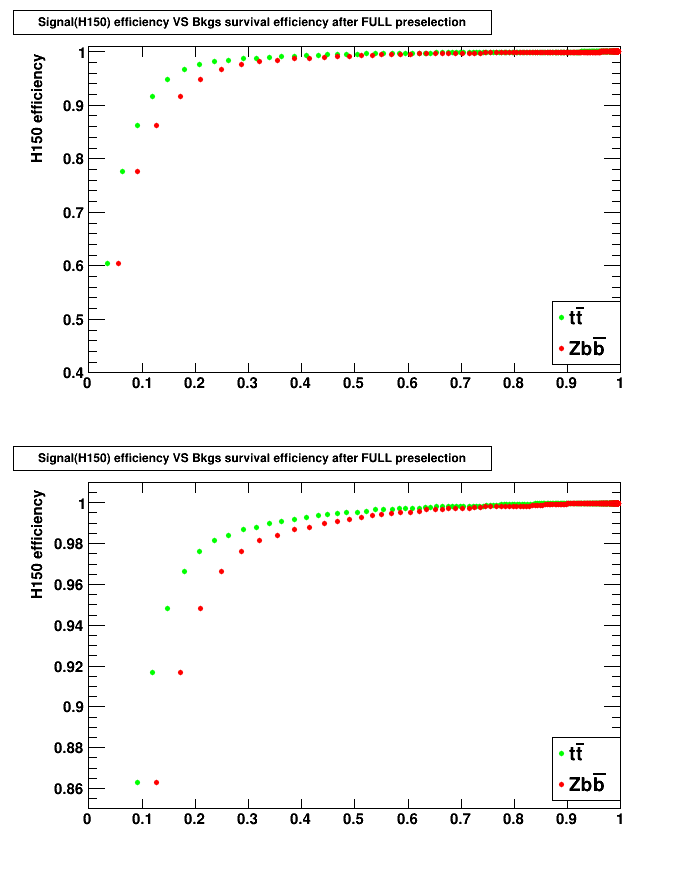

In [55]:
canvas_scatter_2 = ROOT.TCanvas("scatter_canvas_2", "Canvas Scatter 2", 700, 900)
canvas_scatter_2.SetGridx()
canvas_scatter_2.SetGridy()
canvas_scatter_2.Divide(0,2)
canvas_scatter_2.cd(1)
hframe3 = ROOT.TH2F(
    "hframe3",
    "Signal(H150) efficiency VS Bkgs survival efficiency after FULL preselection",
    100,0.,1.,100, 0.4,1.01 #we set the lower limit to 0.4 to make the plot more readable
)
hframe3.SetStats(0)
hframe3.SetYTitle("H150 efficiency")
hframe3.SetXTitle("bkgs survival efficiency")

hframe3.Draw()

gr_h150_TT_vtx.Draw("P")
gr_h150_Zbb_vtx.Draw("Psame")

leg4 = ROOT.TLegend(.8,.15,.9,.3)
#leg4.SetTextFont(42)
leg4.SetFillColor(0)
leg4.SetTextSize(0.05)
leg4.AddEntry(gr_h150_TT_vtx,"t#bar{t}", "P")
leg4.AddEntry(gr_h150_Zbb_vtx,"Zb#bar{b}", "P")
leg4.Draw()
#Zoom
canvas_scatter_2.cd(2)
hframe4 = ROOT.TH2F("hframe4",
    "Signal(H150) efficiency VS Bkgs survival efficiency after FULL preselection",
    100,0.,1.,100,0.85,1.01 #we set the lower limit to 0.85 to make the plot more readable
)
hframe4.SetStats(0)
hframe4.Draw()

hframe4.SetYTitle("H150 efficiency")
hframe4.SetXTitle("bkgs survival efficiency")

gr_h150_TT_vtx.Draw("P")
gr_h150_Zbb_vtx.Draw("Psame")

leg5 = ROOT.TLegend(.8,.15,.9,.3)
#leg5.SetTextFont(42)
leg5.SetFillColor(0)
leg5.SetTextSize(0.05)
leg5.AddEntry(gr_h150_TT_vtx,"t#bar{t}", "P")
leg5.AddEntry(gr_h150_Zbb_vtx,"Zb#bar{b}", "P")
leg5.Draw()

canvas_scatter_2.Update()
canvas_scatter_2.Draw()
canvas_scatter_2.SaveAs(f"{plot_dir}scatt-effic_H150-vsBkgs-overlap_{var1}_{date}.png")


In [54]:
canvas_scatter_2.Clear()
canvas_scatter_2.Close()

#COMPARISON WITH 2nd VARIABLE

Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/exercise_9/Plots/linear_scatt-effic_H150-vsBkgs-overlap-LeptIP3D_worst-LeptSTIP_SLIP_worst_2025-05-03.png has been created


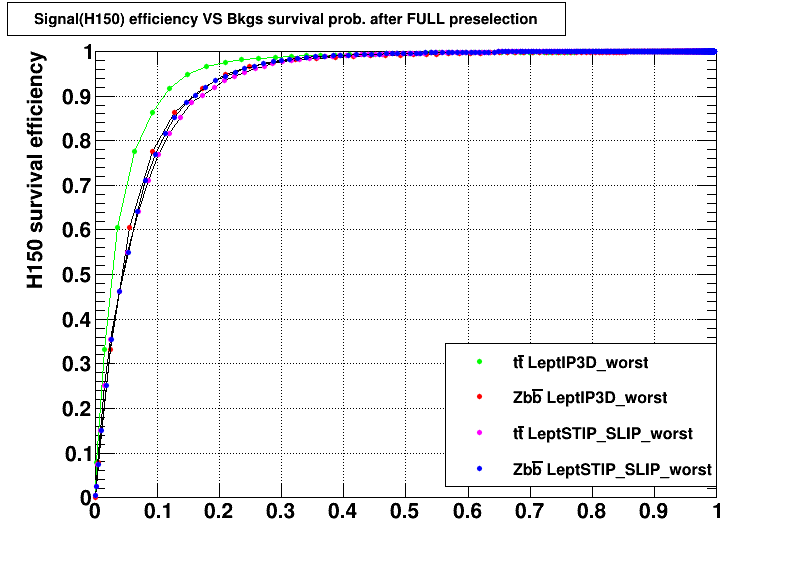

In [56]:
logscale = False

canvas_scat_eff = ROOT.TCanvas("scatter_efficiency", "Scatter Efficiency", 800, 600)

ymin = 1e-6
ymax = 2.2 if logscale else 0.999999

ROOT.gStyle.SetOptStat(0)
ROOT.gPad.SetGridx()
ROOT.gPad.SetGridy()
hframe6 = ROOT.TH2F(
    "hframe6",
    "Signal(H150) efficiency VS Bkgs survival prob. after FULL preselection",
    100, 0.000001, 0.999999,
    100, ymin, ymax
)
hframe6.SetStats(0)
hframe6.Draw()
if logscale:
    canvas_scat_eff.SetLogy()

hframe6.SetXTitle("bkgs efficiency")
hframe6.SetYTitle("H150 survival efficiency")

x_values_TT_var2 = array('d', IntegralCounts2[1])
y_values_TT_var2 = array('d', IntegralCounts2[0])

x_values_Zbb_var2 = array('d', IntegralCounts2[2])
y_values_Zbb_var2 = array('d', IntegralCounts2[0])

length_TT_var2 = len(x_values_TT_var2)
length_Zbb_var2 = len(x_values_Zbb_var2)

gr_h150_TT_var2 = ROOT.TGraph(length_TT_var2, x_values_TT_var2, y_values_TT_var2)
gr_h150_TT_var2.SetMarkerColor(6)
gr_h150_TT_var2.SetMarkerSize(0.7) #0.65
gr_h150_TT_var2.SetMarkerStyle(20) #21

gr_h150_Zbb_var2 = ROOT.TGraph(length_Zbb_var2, x_values_Zbb_var2, y_values_Zbb_var2)
gr_h150_Zbb_var2.SetMarkerColor(4)
gr_h150_Zbb_var2.SetMarkerSize(0.7) #0.65
gr_h150_Zbb_var2.SetMarkerStyle(20) #21

x_values_TT_vtx = array('d', IntegralCounts1[1])
y_values_TT_vtx = array('d', IntegralCounts1[0])
length_TT_vtx = len(x_tt)

x_values_Zbb_vtx = array('d', IntegralCounts1[2])
y_values_Zbb_vtx = array('d', IntegralCounts1[0])
length_Zbb_vtx = len(x_zbb)

gr_h150_TT_vtx = ROOT.TGraph(length_TT_vtx, x_tt, y_tt)
gr_h150_TT_vtx.SetMarkerColor(3)
gr_h150_TT_vtx.SetMarkerSize(0.6)
gr_h150_TT_vtx.SetMarkerStyle(20)

gr_h150_Zbb_vtx = ROOT.TGraph(length_Zbb_vtx, x_zbb, y_zbb)
gr_h150_Zbb_vtx.SetMarkerColor(2)
gr_h150_Zbb_vtx.SetMarkerSize(0.6) #0.65
gr_h150_Zbb_vtx.SetMarkerStyle(20) #21

gr_h150_TT_vtx.SetLineColor(3)
gr_h150_TT_vtx.Draw("LP")
#gr_h150_Zbb_vtx.SetLineColor(2)
gr_h150_Zbb_vtx.Draw("LP same")
gr_h150_TT_var2.Draw("LP same")
gr_h150_Zbb_var2.Draw("LP same")

leg6 = ROOT.TLegend(0.56, 0.15, 0.9, 0.4)
leg6.SetFillColor(0)
leg6.SetTextSize(0.03) #default: 0.05
leg6.AddEntry(gr_h150_TT_vtx, f"t#bar{{t}} {var1}", "P")
leg6.AddEntry(gr_h150_Zbb_vtx, f"Zb#bar{{b}} {var1}", "P")
leg6.AddEntry(gr_h150_TT_var2, f"t#bar{{t}} {var2}", "P")
leg6.AddEntry(gr_h150_Zbb_var2, f"Zb#bar{{b}} {var2}", "P")
leg6.Draw()

canvas_scat_eff.Update()
canvas_scat_eff.Draw()

if not logscale:
    canvas_scat_eff.SaveAs(f"{plot_dir}linear_scatt-effic_H150-vsBkgs-overlap-{var1}-{var2}_{date}.png")
else:
    canvas_scat_eff.SaveAs(f"{plot_dir}log_scatt-effic_H150-vsBkgs-overlap-{var1}-{var2}_{date}.png")

# MyC.Clear()

In [57]:
canvas_scat_eff.Clear()
canvas_scat_eff.Close()

In [59]:
# Use closed_curve to prepare the full ROC arrays
x_tt_full_var2,  y_tt_full_var2  = closed_curve(x_values_TT_var2,  y_values_TT_var2)
x_zbb_full_var2, y_zbb_full_var2 = closed_curve(x_values_Zbb_var2, y_values_Zbb_var2)

# Then compute the AUC via numpy.trapezoid
auc_tt_var2  = np.trapezoid(y_tt_full_var2,  x_tt_full_var2)
auc_zbb_var2 = np.trapezoid(y_zbb_full_var2, x_zbb_full_var2)

print(f"AUC_tt̄_vs_H150 for {var2} (np.trapezoid) = {auc_tt_var2:.4f}")
print(f"AUC_Zb̄b_vs_H150 for {var2} (np.trapezoid) = {auc_zbb_var2:.4f}")
print("\n")

# Compute AUC via sklearn for var1
auc_tt_var2_sk   = sklearn_auc(x_tt_full_var2,  y_tt_full_var2)
auc_zbb_var2_sk  = sklearn_auc(x_zbb_full_var2, y_zbb_full_var2)

print(f"AUC_tt̄_vs_H150 for {var2} (sklearn) = {auc_tt_var2_sk:.4f}")
print(f"AUC_Zb̄b_vs_H150 for {var2} (sklearn) = {auc_zbb_var2_sk:.4f}")


AUC_tt̄_vs_H150 for LeptSTIP_SLIP_worst (np.trapezoid) = 0.9289
AUC_Zb̄b_vs_H150 for LeptSTIP_SLIP_worst (np.trapezoid) = 0.9311


AUC_tt̄_vs_H150 for LeptSTIP_SLIP_worst (sklearn) = 0.9289
AUC_Zb̄b_vs_H150 for LeptSTIP_SLIP_worst (sklearn) = 0.9311


In [60]:
import pandas as pd

# Build a tidy table of just the sklearn AUC results for both var1 and var2
auc_data = {
    "Comparison": [
        f"tt̄ vs H150 ({var1})",
        f"Zb̄b vs H150 ({var1})",
        f"tt̄ vs H150 ({var2})",
        f"Zb̄b vs H150 ({var2})"
    ],
    "AUC": [
        auc_tt_var1_sk,
        auc_zbb_var1_sk,
        auc_tt_var2_sk,
        auc_zbb_var2_sk
    ]
}

pd.DataFrame(auc_data)



Comparison       AUC
0        tt̄ vs H150 (LeptIP3D_worst)  0.952161
1       Zb̄b vs H150 (LeptIP3D_worst)  0.931232
2   tt̄ vs H150 (LeptSTIP_SLIP_worst)  0.928861
3  Zb̄b vs H150 (LeptSTIP_SLIP_worst)  0.931054